Breast Cancer Wisconsin (Diagnostic) Data Set

! pip install keras

In [1]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input 
from keras.optimizers import SGD
from tensorflow import keras
from tensorflow.keras import layers, models

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output


In [3]:
# Read the data file

data = pd.read_excel('GaussianMixture.xlsx')
data.head()

,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,GaussianMixture
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0


In [4]:
# Cleaning and modifying the data
data = data.drop('Unnamed: 0',axis=1)

# Scaling the dataset
datas = pd.DataFrame(preprocessing.scale(data.iloc[:,1:23]))
datas.columns = list(data.iloc[:,1:23].columns)
datas['GaussianMixture'] = data['GaussianMixture']

# Creating the high dimensional feature space X
data_drop = datas.drop('GaussianMixture',axis=1)
X = data_drop.values
Y=data['GaussianMixture'] 

In [5]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2430    0
2431    0
2432    0
2433    0
2434    0
Name: GaussianMixture, Length: 2435, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.25)



In [1]:
#Bulids ANN liyers

import keras;
from keras.models import Sequential;
from keras.layers import Dense;

network = Sequential();
        #Hidden Layer#1
network.add(Dense(units=6,
                  activation='relu',
                  kernel_initializer='uniform',
                  input_dim=22));

        #Hidden Layer#2
network.add(Dense(units=6,
                  activation='relu',
                  kernel_initializer='uniform'));

        #Exit Layer
network.add(Dense(units=1,
                  activation='sigmoid',
                  kernel_initializer='uniform'));

from ann_visualizer.visualize import ann_viz;

ann_viz(network, title="");

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2816      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,033
Trainable params: 8,033
Non-trainabl

In [9]:
import visualkeras

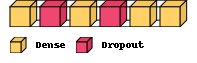

In [10]:
visualkeras.layered_view(model1, legend=True)

pip install ann_visualizer

pip install graphviz

from ann_visualizer.visualize import ann_viz;
ann_viz(network, title="");

In [11]:
#optomize lyers

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


C:\Users\TOSHIBA\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
#optomize lyers

#model1.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])


In [13]:
# Fit and test the model by randomly splitting it 

history=model1.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=10,validation_split=0.33)

Epoch 1/10
58/58 [==============================] - 14s 74ms/step - loss: 0.2451 - accuracy: 0.9107 - val_loss: 0.0280 - val_accuracy: 0.9951
Epoch 2/10
58/58 [==============================] - 2s 27ms/step - loss: 0.0186 - accuracy: 0.9973 - val_loss: 0.0271 - val_accuracy: 0.9951
Epoch 3/10
58/58 [==============================] - 1s 21ms/step - loss: 0.0097 - accuracy: 0.9984 - val_loss: 0.0279 - val_accuracy: 0.9951
Epoch 4/10
58/58 [==============================] - 1s 19ms/step - loss: 0.0065 - accuracy: 0.9989 - val_loss: 0.0312 - val_accuracy: 0.9951
Epoch 5/10
58/58 [==============================] - 1s 20ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0333 - val_accuracy: 0.9951
Epoch 6/10
58/58 [==============================] - 1s 21ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 0.0357 - val_accuracy: 0.9951
Epoch 7/10
58/58 [==============================] - 1s 20ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0371 - val_accuracy: 0.9951
Epoch 8/10
5

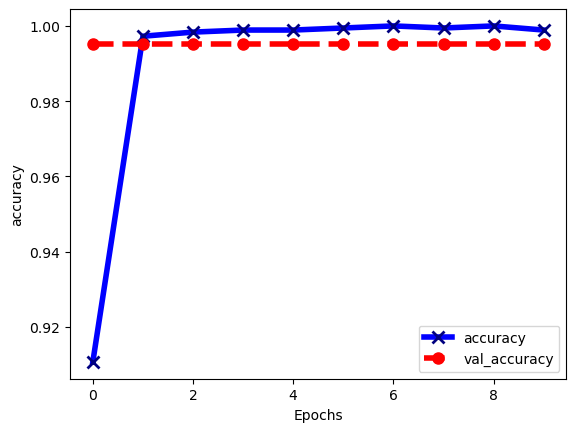

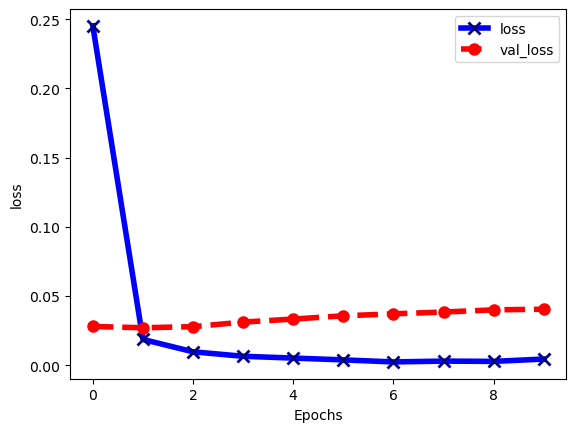

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string], 'b-x', linewidth=4, markersize=8, markeredgewidth=2, markeredgecolor='navy')
  plt.plot(history.history['val_'+string],'r--o', linewidth=4, markersize=8,)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [15]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'])
  plt.show()


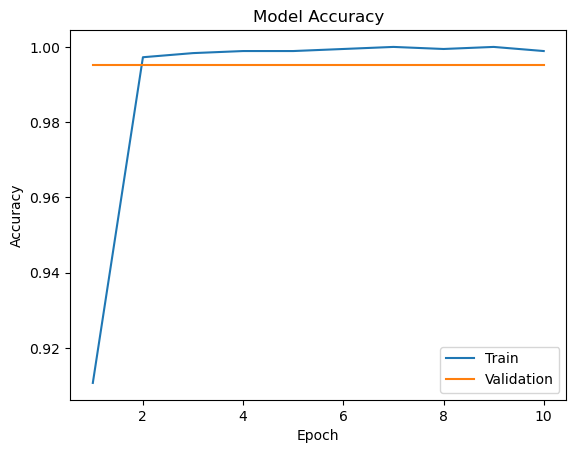

In [16]:
plotLearningCurve(history,10)

In [17]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper right')
  plt.show()

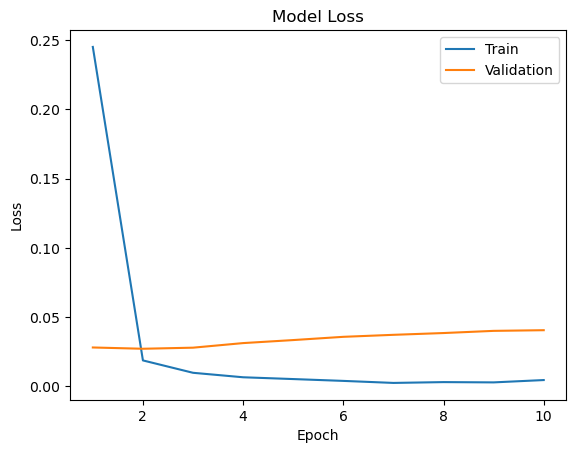

In [18]:
plotLearningCurve(history,10)

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [20]:

y_pred_test=model1.predict(X_test)
y_pred_test

20/20 [==============================] - 1s 9ms/step


array([[9.99999821e-01],
       [1.00000000e+00],
       [2.71085696e-06],
       [9.99998212e-01],
       [1.00000000e+00],
       [9.99999762e-01],
       [6.23198162e-07],
       [1.27521944e-05],
       [9.39443999e-06],
       [3.28784772e-05],
       [6.65086134e-07],
       [2.97010979e-06],
       [1.41754708e-05],
       [1.43438228e-05],
       [7.66559424e-06],
       [1.38777586e-05],
       [9.99999404e-01],
       [8.59030422e-07],
       [9.99080300e-01],
       [9.99999523e-01],
       [9.99841928e-01],
       [1.00000000e+00],
       [3.88540047e-06],
       [2.21466224e-04],
       [1.00000000e+00],
       [1.79373979e-04],
       [9.99999702e-01],
       [9.99999642e-01],
       [9.99999940e-01],
       [2.16751650e-05],
       [1.48065074e-05],
       [9.13115400e-07],
       [2.20317834e-05],
       [2.76800765e-05],
       [9.99850392e-01],
       [7.43803412e-07],
       [7.22028853e-05],
       [1.38931982e-05],
       [1.62183314e-05],
       [2.34504187e-05],
